In [1]:
from importlib import reload
import numpy as np
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
# import modules
import src.models
reload(src.models)
from src.models import *

import src.dataMethods
reload(src.dataMethods)
from src.dataMethods import *

In [3]:
# open up the gestures text file, which contains a list of possible gestures
with open('params/gesturesV2.txt') as f:
    gestures = f.read()
    gestures = gestures.split()
# get dictionaries for those gestures
g2idx = {g: i for i, g in enumerate(gestures)}
idx2g = {i: g for i, g in enumerate(gestures)}
print(g2idx)
print(idx2g)

{'no_gesture': 0, 'call_me': 1, 'fist': 2, 'gun': 3, 'maybe': 4, 'ok': 5, 'open_close': 6, 'peace': 7, 'pointing': 8, 'shuffle_over': 9, 'so_so': 10, 'stop': 11, 'thumbs_up': 12, 'thumbs_down': 13, 'wave': 14}
{0: 'no_gesture', 1: 'call_me', 2: 'fist', 3: 'gun', 4: 'maybe', 5: 'ok', 6: 'open_close', 7: 'peace', 8: 'pointing', 9: 'shuffle_over', 10: 'so_so', 11: 'stop', 12: 'thumbs_up', 13: 'thumbs_down', 14: 'wave'}


In [6]:
# get data frame with the variables of interest
# create empty data frame
df = pd.DataFrame()
# read in all training data from loops directory
for file in os.scandir('data/train/'):
    df2 = CSV2VoI(file)
    df = pd.concat([df, df2], ignore_index=True)

mean fps: 115.17
target fps: 25
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True
mean fps: 115.19
target fps: 25
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True
mean fps: 115.23
target fps: 25
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True
mean fps: 115.26
target fps: 25
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True
mean fps: 115.23
target fps: 25
skipping every 5 frames
Found left hand data:  False
Found right hand data:  True


C:\Users\Andrew\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


mean fps: 113.75
target fps: 25
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True
mean fps: 115.21
target fps: 25
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True
mean fps: 115.20
target fps: 25
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True
mean fps: 115.12
target fps: 25
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True
mean fps: 115.24
target fps: 25
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True
mean fps: 115.23
target fps: 25
skipping every 5 frames
Found left hand data:  False
Found right hand data:  True
mean fps: 115.19
target fps: 25
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True
mean fps: 115.23
target fps: 25
skipping every 5 frames
Found left hand data:  True
Found right hand data:  True
mean fps: 115.22
target fps: 25
skipping every 5 frames
Found left hand data:  False
Found righ

In [8]:
# extract X and y
X_contiguous, y_contiguous = df2X_y(df, g2idx)
X, y = X_y2examples(X_contiguous, y=y_contiguous, n_frames=25)
synced_shuffle(X, y)

dropped 1353 of 48383 rows with nans


In [12]:
model = many2one_model(n_features = X.shape[-1], n_frames=X.shape[1], n_gestures=len(g2idx), rnn_units=32, bidirectional = False)

Model: "many2one"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 25, 21)]          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                6912      
_________________________________________________________________
dense_1 (Dense)              (None, 15)                495       
Total params: 7,407
Trainable params: 7,407
Non-trainable params: 0
_________________________________________________________________


In [13]:
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X, y, epochs=60, batch_size = 64, validation_split=0.1)

Train on 1619 samples, validate on 180 samples
Epoch 1/60
1619/1619 [==============================] - 4s 2ms/sample - loss: 2.6451 - accuracy: 0.1174 - val_loss: 2.5095 - val_accuracy: 0.1944
Epoch 2/60
1619/1619 [==============================] - 0s 245us/sample - loss: 2.3845 - accuracy: 0.2996 - val_loss: 2.2737 - val_accuracy: 0.3667
Epoch 3/60
1619/1619 [==============================] - 0s 239us/sample - loss: 2.1334 - accuracy: 0.4070 - val_loss: 2.0247 - val_accuracy: 0.4611
Epoch 4/60
1619/1619 [==============================] - 0s 218us/sample - loss: 1.8599 - accuracy: 0.4954 - val_loss: 1.7747 - val_accuracy: 0.5333
Epoch 5/60
1619/1619 [==============================] - 0s 235us/sample - loss: 1.5853 - accuracy: 0.5985 - val_loss: 1.5535 - val_accuracy: 0.5500
Epoch 6/60
1619/1619 [==============================] - 0s 226us/sample - loss: 1.3415 - accuracy: 0.6905 - val_loss: 1.3482 - val_accuracy: 0.6333
Epoch 7/60
1619/1619 [==============================] - 0s 213us/sa

In [15]:
model.save('models/V2/25f_32hs_15c_2.h5')

In [39]:
model = tf.keras.models.load_model('models/V2/25f_32hs_15c_2.h5')

In [41]:
# load test data
X_test, y_test = CSV2examples('data/recordings/test_loop.csv', g2idx=g2idx, n_frames=50)

mean fps: 115.19
target fps: 25
skipping every 5 frames
Found left hand data:  False
Found right hand data:  True
dropped 0 of 2777 rows with nans


In [50]:
# predict on a random test case
i = np.random.randint(0, len(X_test))
print(i)
pred = model.predict(np.expand_dims(np.array(X_test[i]), axis=0))
print(pred)
print('Predicted: ', idx2g[np.argmax(pred)])
print('Truth: ', idx2g[y_test[i]])

33
[[0.95594496 0.04405507]]
Predicted:  no_gesture
Truth:  fist


In [54]:
print(idx2g[y[1]])

so_so


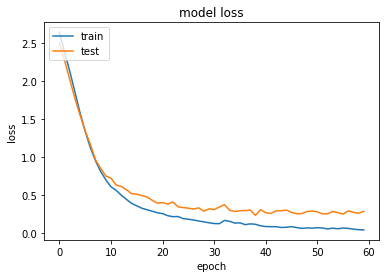

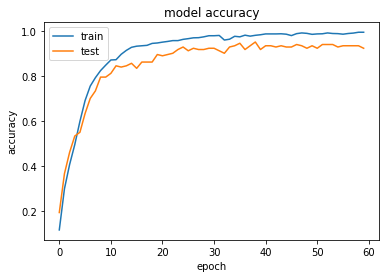

In [14]:
# plot history:
plt_metric(history, 'loss')
plt_metric(history, 'accuracy')

In [47]:
df.columns
df2 = df.reindex(sorted(df.columns), axis=1)
df.columns

Index(['gesture', 'left_index_tipPosition_0', 'left_index_tipPosition_1',
       'left_index_tipPosition_2', 'left_middle_tipPosition_0',
       'left_middle_tipPosition_1', 'left_middle_tipPosition_2',
       'left_ring_tipPosition_0', 'left_ring_tipPosition_1',
       'left_ring_tipPosition_2', 'left_pinky_tipPosition_0',
       'left_pinky_tipPosition_1', 'left_pinky_tipPosition_2',
       'left_thumb_tipPosition_0', 'left_thumb_tipPosition_1',
       'left_thumb_tipPosition_2', 'left_palmVelocity_0',
       'left_palmVelocity_1', 'left_palmVelocity_2', 'left_pinchDistance',
       'left_grabAngle', 'left_direction_0', 'right_index_tipPosition_0',
       'right_index_tipPosition_1', 'right_index_tipPosition_2',
       'right_middle_tipPosition_0', 'right_middle_tipPosition_1',
       'right_middle_tipPosition_2', 'right_ring_tipPosition_0',
       'right_ring_tipPosition_1', 'right_ring_tipPosition_2',
       'right_pinky_tipPosition_0', 'right_pinky_tipPosition_1',
       'right_pi